## Импорт пакетов

In [1]:
# !conda install -c conda-forge lightgbm -y

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import lightgbm as lgb
from lightgbm import LGBMClassifier

from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [3]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve

# Загрузка данных

[browser clicks](https://www.kaggle.com/ryndova/browser-clicks)

In [4]:
X_train = pd.read_csv('./data/X_train.csv')
X_train

,ID,Country_Code,City_ID,DBM_Request_Time,DBM_Creative_ID,DBM_Language,DBM_Operating_System_ID,DBM_Browser_Platform_ID,DBM_Device_Type,DBM_Mobile_Model_ID,domen
0,216627,RU,29451.0,2019-12-31 13:34:15,215162880.0,RU,1175.0,3.0,2.0,6997.0,russianfood.com
1,1392116,RU,29435.0,2019-12-26 09:34:49,215162880.0,RU,1212.0,6.0,2.0,1013.0,mbapp_url
2,9251464,RU,NaN,2019-12-25 11:10:03,215162880.0,RU,1205.0,3.0,2.0,7973.0,mbapp_url
3,10646182,RU,29356.0,2019-12-31 17:50:51,215162880.0,RU,1205.0,3.0,2.0,7973.0,news.sportbox.ru
4,5534849,RU,29378.0,2019-12-30 09:50:27,215162880.0,RU,1175.0,3.0,2.0,7016.0,mbapp_url
...,...,...,...,...,...,...,...,...,...,...,...
9997725,6550634,RU,29451.0,2019-12-19 01:05:46,210330400.0,RU,1181.0,3.0,2.0,7812.0,mbapp_url
9997726,16094478,RU,29377.0,2019-12-26 14:41:47,215162880.0,RU,1175.0,0.0,2.0,7812.0,other
9997727,6423388,RU,29492.0,2019-12-25 08:39:25,215163790.0,RU,1205.0,3.0,2.0,7767.0,mbapp_url
9997728,15351219,RU,29468.0,2019-12-28 00:16:44,215162880.0,Other,1205.0,3.0,2.0,7973.0,nice-books.ru


In [5]:
y_train = pd.read_csv('./data/y_train.csv')
y_train

,ID,TARGET
0,216627,0
1,1392116,0
2,9251464,0
3,10646182,0
4,5534849,0
...,...,...
9997725,6550634,0
9997726,16094478,0
9997727,6423388,0
9997728,15351219,0


In [6]:
X_valid = pd.read_csv('./data/X_valid.csv')
X_valid

,ID,Country_Code,City_ID,DBM_Request_Time,DBM_Creative_ID,DBM_Language,DBM_Operating_System_ID,DBM_Browser_Platform_ID,DBM_Device_Type,DBM_Mobile_Model_ID,domen
0,10757267,RU,29378.0,2019-12-24 23:37:26,215162880.0,RU,1175.0,3.0,2.0,7016.0,kp.ru
1,6100469,RU,NaN,2019-12-27 04:09:50,215163790.0,RU,1175.0,3.0,2.0,6450.0,expert.ru
2,3054264,RU,29459.0,2019-12-30 22:42:53,215162880.0,RU,1181.0,3.0,2.0,6459.0,drive2.ru
3,8881779,RU,29514.0,2019-12-23 20:10:01,215162880.0,RU,1181.0,3.0,2.0,6458.0,other
4,6229019,RU,NaN,2019-12-29 01:47:25,215162880.0,RU,1181.0,3.0,2.0,6459.0,other
...,...,...,...,...,...,...,...,...,...,...,...
6665149,5004655,RU,NaN,2019-12-26 02:40:40,215162880.0,RU,1205.0,3.0,2.0,7766.0,versiya.info
6665150,2173419,RU,29356.0,2019-12-24 05:03:52,215162880.0,RU,1181.0,3.0,2.0,8468.0,other
6665151,15078941,RU,29377.0,2019-12-25 08:16:40,215163790.0,RU,1205.0,3.0,2.0,7766.0,mbapp_url
6665152,15904219,RU,29378.0,2019-12-26 15:32:52,215162880.0,RU,1175.0,3.0,2.0,7016.0,moon-today.com


## Анализ

## Типы данных

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997730 entries, 0 to 9997729
Data columns (total 11 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   ID                       int64  
 1   Country_Code             object 
 2   City_ID                  float64
 3   DBM_Request_Time         object 
 4   DBM_Creative_ID          float64
 5   DBM_Language             object 
 6   DBM_Operating_System_ID  float64
 7   DBM_Browser_Platform_ID  float64
 8   DBM_Device_Type          float64
 9   DBM_Mobile_Model_ID      object 
 10  domen                    object 
dtypes: float64(5), int64(1), object(5)
memory usage: 839.0+ MB


## Пропущенные значения

In [8]:
X_train.isna().sum()

ID                               0
Country_Code                     0
City_ID                    1188164
DBM_Request_Time                 0
DBM_Creative_ID                  0
DBM_Language                     0
DBM_Operating_System_ID          0
DBM_Browser_Platform_ID          0
DBM_Device_Type                  0
DBM_Mobile_Model_ID              0
domen                            0
dtype: int64

## Дублирования

In [9]:
X_train.duplicated().sum()

0

## Уникальные значения

In [10]:
for col in X_train.columns:
    print(f'column: {col}')
    
    nunique = X_train[col].nunique()
    print(f'nunique: {nunique}')
    
    if nunique < 50:
        display(X_train[col].value_counts())
    
    print('-'*20, '\n')

column: ID
nunique: 9997730
-------------------- 

column: Country_Code
nunique: 2


RU       9973956
Other      23774
Name: Country_Code, dtype: int64

-------------------- 

column: City_ID
nunique: 994
-------------------- 

column: DBM_Request_Time
nunique: 1090005
-------------------- 

column: DBM_Creative_ID
nunique: 7


215162880.0    6284141
210330400.0    2198877
215163790.0    1165425
215161760.0     205201
215162380.0      66241
215163700.0      41749
215164000.0      36096
Name: DBM_Creative_ID, dtype: int64

-------------------- 

column: DBM_Language
nunique: 2


RU       9256017
Other     741713
Name: DBM_Language, dtype: int64

-------------------- 

column: DBM_Operating_System_ID
nunique: 36


1205.0    3664921
1181.0    3298617
1175.0    1078236
1173.0     694377
1212.0     366856
1215.0     186061
1219.0     108873
1144.0      81034
1216.0      78768
1170.0      51077
1209.0      48973
1211.0      43163
1206.0      39964
1171.0      38558
1218.0      38480
1213.0      34400
1203.0      21429
1210.0      20739
1178.0      16532
1201.0      15152
1204.0      11623
1177.0       9533
1207.0       9368
1214.0       8688
1202.0       7028
1180.0       6913
1006.0       5031
1169.0       3407
1176.0       2941
1012.0       2732
1174.0       2298
1168.0        854
1167.0        328
1165.0        316
1162.0        241
1163.0        219
Name: DBM_Operating_System_ID, dtype: int64

-------------------- 

column: DBM_Browser_Platform_ID
nunique: 5


3.0       8459393
6.0        847534
0.0        638763
1038.0      39544
1.0         12496
Name: DBM_Browser_Platform_ID, dtype: int64

-------------------- 

column: DBM_Device_Type
nunique: 2


2.0    9936671
3.0      61059
Name: DBM_Device_Type, dtype: int64

-------------------- 

column: DBM_Mobile_Model_ID
nunique: 100
-------------------- 

column: domen
nunique: 100
-------------------- 



## Баланс классов

In [11]:
y_train.TARGET.value_counts()

0    9962580
1      35150
Name: TARGET, dtype: int64

In [12]:
def plot_cat_count_s(cs: pd.Series):
    """
    Функция для рисования countplot для Series
    """
    fig, ax = plt.subplots(1, 1, figsize=(6, 2))
    g = sns.countplot(x=cs, 
                      ax=ax)
    g.set_xticklabels(g.get_xticklabels(), 
                      rotation=45, 
                      horizontalalignment='right')

    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)

    ax.set_title(cs.name, 
                 loc='right', 
                 fontsize=15)
    ax.grid()

    total = len(cs)
    
    print(f"{total} ({cs.name})")

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x_pos = p.get_x()
        y_pos = p.get_y() + p.get_height()
        ax.annotate(percentage, 
                    xy=(x_pos, y_pos), 
                    fontsize=15)

9997730 (TARGET)


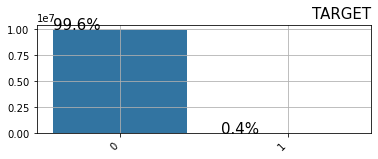

In [13]:
plot_cat_count_s(y_train.TARGET)

## Распределение числовых признаков

In [14]:
num_cols = X_train.select_dtypes(include=np.number).drop('ID', axis=1).drop('City_ID', axis=1).columns.tolist()
num_cols

['DBM_Creative_ID',
 'DBM_Operating_System_ID',
 'DBM_Browser_Platform_ID',
 'DBM_Device_Type']

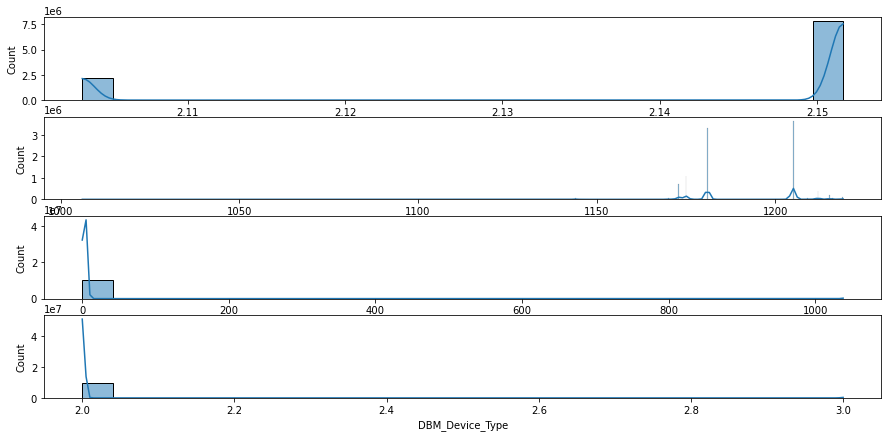

In [15]:
fig, axes = plt.subplots(len(num_cols), figsize=(15, 7))

for index, col in enumerate(num_cols):
    sns.histplot(data=X_train[col], kde=True, ax=axes[index])

# Корреляция

In [16]:
correlation_matrix = X_train.corr()

Text(0.5, 1.0, 'Correlation Matrix of features')

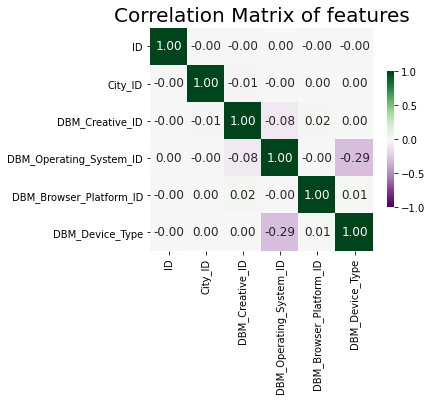

In [17]:
plt.figure(figsize=(5, 5))

ax = sns.heatmap(
    correlation_matrix,
    square=True,
    annot=True,
    fmt='.2f',
    cmap='PRGn',
    cbar_kws={"shrink": .5},
    annot_kws={"size": 12},
    robust=True,
    vmin=-1, 
    vmax=1
)

plt.title('Correlation Matrix of features', fontsize=20)

# Эксперименты с моделью

In [18]:
# TODO: DBM_Request_Time - разбить на время, день недели

In [19]:
X_train.columns.to_list()

['ID',
 'Country_Code',
 'City_ID',
 'DBM_Request_Time',
 'DBM_Creative_ID',
 'DBM_Language',
 'DBM_Operating_System_ID',
 'DBM_Browser_Platform_ID',
 'DBM_Device_Type',
 'DBM_Mobile_Model_ID',
 'domen']

In [20]:
X_train

,ID,Country_Code,City_ID,DBM_Request_Time,DBM_Creative_ID,DBM_Language,DBM_Operating_System_ID,DBM_Browser_Platform_ID,DBM_Device_Type,DBM_Mobile_Model_ID,domen
0,216627,RU,29451.0,2019-12-31 13:34:15,215162880.0,RU,1175.0,3.0,2.0,6997.0,russianfood.com
1,1392116,RU,29435.0,2019-12-26 09:34:49,215162880.0,RU,1212.0,6.0,2.0,1013.0,mbapp_url
2,9251464,RU,NaN,2019-12-25 11:10:03,215162880.0,RU,1205.0,3.0,2.0,7973.0,mbapp_url
3,10646182,RU,29356.0,2019-12-31 17:50:51,215162880.0,RU,1205.0,3.0,2.0,7973.0,news.sportbox.ru
4,5534849,RU,29378.0,2019-12-30 09:50:27,215162880.0,RU,1175.0,3.0,2.0,7016.0,mbapp_url
...,...,...,...,...,...,...,...,...,...,...,...
9997725,6550634,RU,29451.0,2019-12-19 01:05:46,210330400.0,RU,1181.0,3.0,2.0,7812.0,mbapp_url
9997726,16094478,RU,29377.0,2019-12-26 14:41:47,215162880.0,RU,1175.0,0.0,2.0,7812.0,other
9997727,6423388,RU,29492.0,2019-12-25 08:39:25,215163790.0,RU,1205.0,3.0,2.0,7767.0,mbapp_url
9997728,15351219,RU,29468.0,2019-12-28 00:16:44,215162880.0,Other,1205.0,3.0,2.0,7973.0,nice-books.ru


In [21]:
drop_col = ['ID']

cat_col = [
#     'Country_Code',
#            'City_ID',
#            'DBM_Request_Time',
           'DBM_Creative_ID',
           'DBM_Language',
           'DBM_Operating_System_ID',
           'DBM_Browser_Platform_ID',
           'DBM_Device_Type',
#            'DBM_Mobile_Model_ID',
#            'domen'
]

In [22]:
cat_transformer = Pipeline(steps=[
     ('encoder_oh', OneHotEncoder())])

In [23]:
preprocessor = ColumnTransformer(
    transformers=[
#         ('bin_cat_transformer', bin_cat_transformer, bin_columns),
#         ('mul_cat_transformer', mul_cat_transformer, mul_cat_columns),
#         ('num_transformer', num_transformer, num_columns),
        ('cat_transformer', cat_transformer, cat_col),
#         ('passthrough', 'passthrough', cat_col),
        ('drop', 'drop', drop_col),
])

In [24]:
pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('under_sample', RandomUnderSampler()),
    ('model', LGBMClassifier())
])

In [25]:
param_grid = {
    'under_sample__sampling_strategy': list(np.arange(0.3, 1.0, 0.1)),
    'model__max_depth': list(range(3, 15, 1)),  
    'model__n_estimators': list(range(100, 1000, 100))
}

In [26]:
model = GridSearchCV(pipeline, 
                     param_grid, 
                     n_jobs=-1, 
                     scoring='roc_auc', 
                     verbose=10, 
                     return_train_score=True)
model

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat_transformer',
                                                                         Pipeline(steps=[('encoder_oh',
                                                                                          OneHotEncoder())]),
                                                                         ['DBM_Creative_ID',
                                                                          'DBM_Language',
                                                                          'DBM_Operating_System_ID',
                                                                          'DBM_Browser_Platform_ID',
                                                                          'DBM_Device_Type']),
                                                                        ('drop',
                                                                         'dro

In [27]:
import time
start = time.time()

In [ ]:
model.fit(X_train, y_train.TARGET)

Fitting 5 folds for each of 756 candidates, totalling 3780 fits


In [40]:
end = time.time()
print(f"{end - start} sec ~ {(end - start)/60} min ~ {(end - start)/3600} h")

78716.39003801346 sec ~ 1311.939833966891 min ~ 21.865663899448183 h


In [38]:
print("Best parameter (CV score=%0.3f):" % model.best_score_)
print(model.best_params_)

Best parameter (CV score=0.612):
{'model__max_depth': 7, 'model__n_estimators': 100, 'under_sample__sampling_strategy': 0.3}


In [42]:
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__n_estimators,param_under_sample__sampling_strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,8.747161,0.089906,6.257004,0.905680,3,100,0.3,"{'model__max_depth': 3, 'model__n_estimators':...",0.605370,0.617000,0.607466,0.613083,0.606759,0.609936,0.004401,736
1,10.907500,0.529314,7.337669,0.454766,3,100,0.4,"{'model__max_depth': 3, 'model__n_estimators':...",0.604995,0.617226,0.607608,0.612930,0.606043,0.609760,0.004625,749
2,10.893867,0.810307,6.713998,1.018964,3,100,0.5,"{'model__max_depth': 3, 'model__n_estimators':...",0.605443,0.617601,0.607820,0.612519,0.605881,0.609853,0.004615,743
3,8.946491,0.650077,5.939934,0.619557,3,100,0.6,"{'model__max_depth': 3, 'model__n_estimators':...",0.604798,0.616522,0.607732,0.612545,0.604574,0.609234,0.004642,755
4,8.449587,0.129052,5.906425,0.244395,3,100,0.7,"{'model__max_depth': 3, 'model__n_estimators':...",0.605632,0.616816,0.608209,0.613002,0.606251,0.609982,0.004285,729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,28.058123,0.651447,520.118843,109.161905,14,900,0.5,"{'model__max_depth': 14, 'model__n_estimators'...",0.606802,0.618376,0.609994,0.612816,0.606832,0.610964,0.004329,323
752,26.646864,0.326290,535.797374,118.126978,14,900,0.6,"{'model__max_depth': 14, 'model__n_estimators'...",0.607033,0.617400,0.609563,0.611965,0.607520,0.610696,0.003778,497
753,26.221823,0.596718,514.541844,116.194348,14,900,0.7,"{'model__max_depth': 14, 'model__n_estimators'...",0.605890,0.616743,0.611264,0.611587,0.606845,0.610466,0.003882,613
754,25.068822,0.631067,510.981745,130.260847,14,900,0.8,"{'model__max_depth': 14, 'model__n_estimators'...",0.605981,0.615929,0.609837,0.611332,0.607342,0.610084,0.003468,720


In [ ]:
import joblib

joblib.dump(model, './tmp/model_cv-0.611_us-0.5.pkl')

In [37]:
model_tmp = joblib.load('./tmp/model_cv-0.611_us-0.5.pkl')
model_tmp

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat_transformer',
                                                                         Pipeline(steps=[('encoder_oh',
                                                                                          OneHotEncoder())]),
                                                                         ['DBM_Creative_ID',
                                                                          'DBM_Language',
                                                                          'DBM_Operating_System_ID',
                                                                          'DBM_Browser_Platform_ID',
                                                                          'DBM_Device_Type']),
                                                                        ('drop',
                                                                         'dro

In [43]:
def evaluate_model(y_predicted, X_test, y_test):       
    accuracy = accuracy_score(y_test, y_predicted)
    balanced_accuracy = balanced_accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted)
    recall = recall_score(y_test, y_predicted)
    f1 = f1_score(y_test, y_predicted, average='weighted')
    roc_auc = roc_auc_score(y_test, y_predicted)
    
    return [accuracy, balanced_accuracy, precision, recall, f1, roc_auc]

In [44]:
y_train_predicted = model.predict(X_train)

In [45]:
metrics = evaluate_model(y_train_predicted, X_train, y_train.TARGET)

In [46]:
metrics

[0.9858830954626701,
 0.5167505403512975,
 0.014271179915857784,
 0.04429587482219061,
 0.9894753518861933,
 0.5167505403512975]

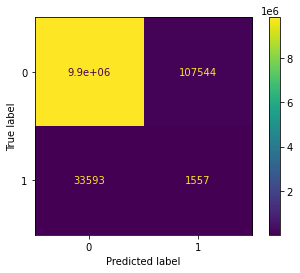

In [47]:
plot_confusion_matrix(model, X_train, y_train.TARGET)

---